In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from random import sample, shuffle
import sys

sys.path.append('/Users/do19150/Gits/Analysis_Funcs/General/')
from fitsloader import XMMtolc

train_val_data = np.loadtxt('/Users/do19150/Gits/ML_QPE/Features/train_val_data_dt1000.csv',delimiter=',')
simlc_test_data = np.loadtxt('/Users/do19150/Gits/ML_QPE/Features/simtest_data_dt1000.csv',delimiter=',')
reallc_test_data = pd.read_csv('/Users/do19150/Gits/ML_QPE/Features/realobs_test_data_dt1000.0.csv',dtype='object')
reallc_test_data = reallc_test_data.astype({'STD/Mean':'float','Prop > 1STD':'float','Prop > 2STD':'float','Prop > 3STD':'float',
                        'Prop > 4STD':'float','Prop > 5STD':'float','Prop > 6STD':'float',
                        'IQR/STD':'float','Skew':'float','Kurtosis':'float','Rev CCF':'float',
                        '2nd ACF':'float','CSSD':'float','Von Neumann Ratio':'float','QPE?':'float'})

/Users/do19150/opt/anaconda3/lib/python3.8/site-packages/stingray/utils.py:24: UserWarning: Numba not installed. Faking it
  warnings.warn("Numba not installed. Faking it")
/Users/do19150/opt/anaconda3/lib/python3.8/site-packages/stingray/largememory.py:25: UserWarning: Large Datasets may not be processed efficiently due to computational constraints
  warnings.warn(
/Users/do19150/opt/anaconda3/lib/python3.8/site-packages/stingray/crossspectrum.py:28: UserWarning: pyfftw not installed. Using standard scipy fft
  warnings.warn("pyfftw not installed. Using standard scipy fft")
/Users/do19150/opt/anaconda3/lib/python3.8/site-packages/stingray/crosscorrelation.py:8: UserWarning: pyfftw not installed. Using standard scipy fft
  warnings.warn("pyfftw not installed. Using standard scipy fft")
/Users/do19150/opt/anaconda3/lib/python3.8/site-packages/stingray/bispectrum.py:10: UserWarning: pyfftw not installed. Using standard scipy fft
  warnings.warn("pyfftw not installed. Using standard scipy

In [2]:
print(train_val_data.shape,simlc_test_data.shape)
print(reallc_test_data.shape,reallc_test_data.columns)

(90000, 15) (10000, 15)
(64, 16) Index(['ObsID', 'STD/Mean', 'Prop > 1STD', 'Prop > 2STD', 'Prop > 3STD',
       'Prop > 4STD', 'Prop > 5STD', 'Prop > 6STD', 'IQR/STD', 'Skew',
       'Kurtosis', 'Rev CCF', '2nd ACF', 'CSSD', 'Von Neumann Ratio', 'QPE?'],
      dtype='object')


In [3]:
#split the train/validation data 80%/20% into training and validation

index_range = list(np.arange(len(train_val_data)))
train_indices = sorted(sample(index_range,int(0.8*len(index_range))))
valid_indices = index_range
for i in train_indices:
    valid_indices.remove(i)

In [4]:
# print(len(train_indices),train_indices[0:20])
# print(len(valid_indices),valid_indices[0:10])

In [5]:
#create the feature sets
training_data = train_val_data[train_indices]
valid_data = train_val_data[valid_indices]

In [6]:
#separate the training and validaiton features and labels

input_data = []
input_labels = []
for i in range(len(training_data)):
    input_data.append(list(training_data[i][0:14]))
    input_labels.append([training_data[i][14]])
    
check_data = []
check_labels = []
for i in range(len(valid_data)):
    check_data.append(list(valid_data[i][0:14]))
    check_labels.append([valid_data[i][14]])

In [7]:
print(len(input_data),len(input_data[0]),len(input_labels),len(input_labels[0]))
print(len(check_data),len(check_data[0]),len(check_labels),len(check_labels[0]))

72000 14 72000 1
18000 14 18000 1


In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(14, activation='relu'),
    tf.keras.layers.Dense(7),
    tf.keras.layers.Dense(2),
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(input_data, input_labels, epochs=10)
test_loss, test_acc = model.evaluate(check_data,  check_labels, verbose=2)

print('\nValidation accuracy:', test_acc)

2022-09-06 12:52:53.285935: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-06 12:52:55.657929: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/10
2250/2250 [==============================] - 1s 501us/step - loss: 0.5054 - accuracy: 0.8863
Epoch 2/10
2250/2250 [==============================] - 1s 499us/step - loss: 0.2222 - accuracy: 0.9275
Epoch 3/10
2250/2250 [==============================] - 1s 498us/step - loss: 0.2096 - accuracy: 0.9329
Epoch 4/10
2250/2250 [==============================] - 1s 498us/step - loss: 0.2047 - accuracy: 0.9351
Epoch 5/10
2250/2250 [==============================] - 1s 498us/step - loss: 0.1996 - accuracy: 0.9378
Epoch 6/10
2250/2250 [==============================] - 1s 501us/step - loss: 0.1976 - accuracy: 0.9379
Epoch 7/10
2250/2250 [==============================] - 1s 504us/step - loss: 0.1964 - accuracy: 0.9386
Epoch 8/10
2250/2250 [==============================] - 1s 509us/step - loss: 0.1923 - accuracy: 0.9403
Epoch 9/10
2250/2250 [==============================] - 1s 507us/step - loss: 0.1924 - accuracy: 0.9401
Epoch 10/10
2250/2250 [==============================] - 1s 501u

In [9]:
#make predictions on simulated test data
sim_test_feats = []
sim_test_labels = []
for i in range(len(simlc_test_data)):
    sim_test_feats.append(list(simlc_test_data[i][0:14]))
    sim_test_labels.append([simlc_test_data[i][14]])
    
print(len(sim_test_feats),len(sim_test_feats[0]),len(sim_test_labels),len(sim_test_labels[0]))

10000 14 10000 1


In [10]:
test_loss, test_acc = model.evaluate(sim_test_feats,  sim_test_labels, verbose=2)

print('\nValidation accuracy:', test_acc)

313/313 - 0s - loss: 0.2148 - accuracy: 0.9354

Validation accuracy: 0.9354000091552734


In [11]:
#make predictions on real test data
real_test_feats = []
real_test_labels = []
for i in range(len(reallc_test_data)):
    real_test_feats.append(list(reallc_test_data.iloc[i,1:15].values))
    real_test_labels.append([reallc_test_data.iloc[i,15]])
    
print(len(real_test_feats),len(real_test_feats[0]),len(real_test_labels),len(real_test_labels[0]))

64 14 64 1


In [12]:
test_loss, test_acc = model.evaluate(real_test_feats,  real_test_labels, verbose=2)

print('\nValidation accuracy:', test_acc)

2/2 - 0s - loss: 63.2972 - accuracy: 0.1719

Validation accuracy: 0.171875


In [13]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [14]:
for i in range(len(real_test_feats)):
    obs_feats = reallc_test_data.iloc[i,:].values
    obs_feats = np.expand_dims(np.asarray(list(obs_feats[1:15])),0)
    prediction = probability_model.predict(obs_feats)
    print(reallc_test_data['ObsID'].values[i],np.argmax(prediction[0]),prediction)

0111790101 1 [[6.808469e-11 1.000000e+00]]
0112550601 1 [[0. 1.]]
0112551701 1 [[1.6870831e-18 1.0000000e+00]]
0124710801 1 [[1.3344171e-29 1.0000000e+00]]
0145800101 1 [[3.5114435e-30 1.0000000e+00]]
0152170501 1 [[4.5656228e-37 1.0000000e+00]]
0200670101 1 [[0. 1.]]
0200670301 1 [[0. 1.]]
0200670401 1 [[5.138825e-32 1.000000e+00]]
0200920101 1 [[0. 1.]]
0304190101 1 [[0. 1.]]
0306630101 1 [[5.667899e-13 1.000000e+00]]
0306630201 1 [[5.6487837e-10 1.0000000e+00]]
0311190101 1 [[2.4595687e-08 1.0000000e+00]]
0401360101 1 [[6.9064585e-30 1.0000000e+00]]
0401360201 1 [[0. 1.]]
0401360301 1 [[0. 1.]]
0411980101 1 [[0. 1.]]
0411980401 1 [[0. 1.]]
0500730101 1 [[0. 1.]]
0500730201 1 [[6.6820816e-37 1.0000000e+00]]
0551450101 1 [[0. 1.]]
0551870401 1 [[0. 1.]]
0551870601 1 [[0. 1.]]
0556090101 1 [[1.8809753e-37 1.0000000e+00]]
0603260201 1 [[0. 1.]]
0651790201 1 [[0. 1.]]
0657820101 1 [[1.2399157e-35 1.0000000e+00]]
0691570101 1 [[7.663909e-37 1.000000e+00]]
0725200101 1 [[8.193352e-11 1.000

In [15]:
print(reallc_test_data['ObsID'].values)

['0111790101' '0112550601' '0112551701' '0124710801' '0145800101'
 '0152170501' '0200670101' '0200670301' '0200670401' '0200920101'
 '0304190101' '0306630101' '0306630201' '0311190101' '0401360101'
 '0401360201' '0401360301' '0411980101' '0411980401' '0500730101'
 '0500730201' '0551450101' '0551870401' '0551870601' '0556090101'
 '0603260201' '0651790201' '0657820101' '0691570101' '0725200101'
 '0725200301' '0740960101' '0761630101' '0761630201' '0761630301'
 '0784510301' '0790650101' '0794581201' '0803670501' '0803670601'
 '0803671001' '0803671101' '0805080401' '0805080501' '0823680101'
 '0831790701' '0842340201' '0851180401' '0851180501' '0861910201'
 '0861910301' '0862760201' '0864330101' '0864330201' '0864330301'
 '0864330401' '0864560101' '0870830101' '0870830201' '0870830301'
 '0870830401' '0872390101' '0891800601' '0893810501']


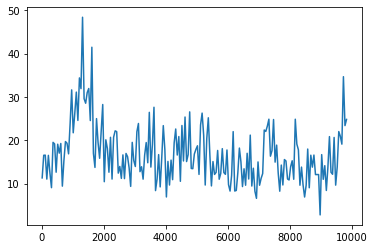

[[0. 1.]]


In [16]:
obs = '0411980401'
obs_features = np.asarray(reallc_test_data.iloc[np.where(reallc_test_data['ObsID'].values == obs)[0],1:15].values)
obs_features.shape
prediction = probability_model.predict(obs_features)
lc = XMMtolc('/Users/do19150/Gits/ML_QPE/Obs/'+obs+'_.2-2.0_t10_pn_filt.lc',t_bin=10)
lc.shift(-lc.time[0]).rebin(50).plot()
print(prediction)